<a href="https://colab.research.google.com/github/Robinzulu/dsc-phase-1-project/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission
Please fill out:

Student name: ROBIN MUTAI
Student pace: part time

Scheduled project review date/time: 4/15/2023

Instructor name: Noah Kandie

Blog post URL:https://github.com/Robinzulu/dsc-phase-1-project

# **OVERVIEW OF THE STUDY:**

The study aims to provide actionable insights to the head of Microsoft's new movie studio by exploring the types of films that are currently doing well at the box office. The project will use exploratory data analysis techniques to gain a deeper understanding of the movie industry and provide insights that can guide decision-making regarding the types of films to create.

# **RESEARCH PROBLEM:**

The research problem is to identify the types of films that are currently performing well at the box office, understand the underlying factors that contribute to their success, and use these insights to guide the decision-making process for the new Microsoft movie studio. The goal is to provide actionable insights that can help the studio create successful films that appeal to audiences and generate profits.


# **BUSINESS UNDERSTANDING**
The stakeholders for this project are Microsoft's new movie studio. The key business questions include:

1. What are the most popular movie genres?
2. What are the most successful movies in terms of revenue and ratings?
3. What is the best time of year to release a movie?

# **Importing Data**

In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/Robinzulu/dsc-phase-1-project.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 76 (delta 0), reused 0 (delta 0), pack-reused 73
Unpacking objects: 100% (76/76), 122.36 MiB | 13.49 MiB/s, done.
/content/cloned-repo/cloned-repo/cloned-repo/cloned-repo
awesome.gif	 LICENSE.md		movie_data_erd.jpeg  student.ipynb
CONTRIBUTING.md  Moringa_Project.ipynb	README.md	     zippedData


In [ ]:
#Import the necessary python library
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import sqlite3
import os
import zipfile

%matplotlib inline

In [ ]:
# specify the path to the directory
dir_path = "/content/cloned-repo/"

# get a list of all the files in the directory
file_list = os.listdir(dir_path)

# print the list of files
print(file_list)

['Moringa_Project.ipynb', '.gitignore', 'awesome.gif', 'cloned-repo', '.git', 'LICENSE.md', 'movie_data_erd.jpeg', 'student.ipynb', '.canvas', 'README.md', 'zippedData', 'CONTRIBUTING.md']


In [ ]:
# construct the path to the zippedData folder
zipped_data_path = os.path.join(dir_path, "zippedData")

# get a list of all the files in the zippedData folder
zipped_data_file_list = os.listdir(zipped_data_path)

# print the list of files in the zippedData folder
print(zipped_data_file_list)

['im.db.zip', 'rt.movie_info.tsv.gz', 'rt.reviews.tsv.gz', 'im.db', 'tn.movie_budgets.csv.gz', 'tmdb.movies.csv.gz', 'bom.movie_gross.csv.gz']


In [ ]:
# specify the path to the zip file
zip_path = "/content/cloned-repo/zippedData/im.db.zip"

# specify the path to extract the unzipped files to
extract_path = "/content/cloned-repo/zippedData/"

# create a ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # extract all the files to the specified directory
    zip_ref.extractall(extract_path)

Coding and Reading the data

In [ ]:
# Establish a connection to the SQLite database
conn = sqlite3.connect( "/content/cloned-repo/zippedData/im.db")

# Define an SQL query to retrieve all columns from the "movie_basics" table
movie_info = """
SELECT *
FROM movie_basics
"""
# Execute the SQL query and return the result set as a pandas dataframe
movie_info = pd.read_sql(movie_info, conn)

In [ ]:
# Retrieve all columns from the "movie_ratings" table
movie_ratings = """
SELECT *
FROM movie_ratings
"""
# Execute the SQL query and return the result set as a pandas dataframe
movie_ratings = pd.read_sql(movie_ratings,conn)

In [ ]:
#Establishing a connection to movie_budget data
movie_budget = pd.read_csv("/content/cloned-repo/zippedData/tn.movie_budgets.csv.gz")

# **Checking data**

In [ ]:
movie_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
movie_info.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


Observation: The Dataset set contains uniformity from top to bottom

In [ ]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
# Display the first few rows of the movie_ratings DataFrame
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
# Display the last few rows of the movie_ratings DataFrame
movie_ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [ ]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Observation: Both dataset contain uniformity from top to bottom

In [ ]:
# Display the first few rows of the movie_budget DataFrame
movie_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Display the last few rows of the movie_budget DataFrame
movie_budget.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


Observation:  There is uniformity in both datasets from beginning to end

In [ ]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Observation:
*   The dataset does not contain any null values.
*   The data types of Production_budget, Domestic_gross, and Worldwide_gross are incorrect and should be integers or float64.

In [ ]:
# Converting production_budget to string before converting to float
movie_budget['production_budget'] = movie_budget['production_budget'].astype(str)
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype('float64')

# Converting domestic_gross to string before converting to float
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype(str)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype('float64')

# Converting wordwide_gross to string before converting to float
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype(str)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype('float64')

# create a new dictionary object that is a copy of the original 
movie_budget = movie_budget.copy()

<ipython-input-221-b473eed881b8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-221-b473eed881b8>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-221-b473eed881b8>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget['worldwide_g

In [ ]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [ ]:
# Merge the dataframes "movie_info" and "movie_ratings" on the "movie_id" column
movie_df = movie_info.merge(movie_ratings, left_on='movie_id', right_on='movie_id')

# Merge the resulting dataframe with the "movie_budget" dataframe on the "primary_title" and "movie" columns respectively
movie_df = movie_df.merge(movie_budget, left_on='primary_title', right_on='movie')

# Display the first few rows of the resulting merged dataframe
movie_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0


# Tidying the dataset

In [ ]:
# Display a summary of the movie_df DataFrame.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  movie              2875 non-null   object 
 11  production_budget  2875 non-null   float64
 12  domestic_gross     2875 non-null   float64
 13  worldwide_gross    2875 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 336.9+ KB


Observations:
*   Primary_title and original_title contain almost the same data hence having both is unneccesary.
*   start_year,runtime_minutes,id and movie are unnecessary in our dataset.
*   The genres column contains some missing data.
*   The runtime column has some missing values.





In [ ]:
# Columns to remove from movie_df : 'original_title','start_year','runtime_minutes','numvotes','movie','id'
movie_df.drop(['original_title','start_year','runtime_minutes','numvotes','movie','id'], axis=1, inplace=True)


original_title and movie were removed because they duplicated the information in primary_title. Similarly, runtime_minutes, id, and numvotes were not relevant to this dataset and were dropped. start-year and release_date were identical, so one of them had to be eliminated.

In [ ]:
# Return a random sample of 15 rows from the movie_df DataFrame
movie_df.sample(15)

,movie_id,primary_title,genres,averagerating,release_date,production_budget,domestic_gross,worldwide_gross
497,tt1323594,Despicable Me,"Animation,Comedy,Family",7.7,"Jul 9, 2010",69000000.0,251513985.0,543464573.0
1467,tt1881085,The Perfect Man,"Drama,Romance",6.2,"Jun 17, 2005",10000000.0,16535005.0,19535005.0
1290,tt1785670,Widows,"Comedy,Drama",6.3,"Nov 16, 2018",40000000.0,42402632.0,73866088.0
2196,tt2848292,Pitch Perfect 2,"Comedy,Music",6.4,"May 15, 2015",29000000.0,184296230.0,287625468.0
1844,tt2467046,Left Behind,"Action,Drama,Fantasy",3.1,"Feb 2, 2001",18500000.0,4221341.0,4221341.0
376,tt1233301,Ironclad,"Action,Adventure,Drama",6.2,"Jul 8, 2011",25000000.0,0.0,5297411.0
1741,tt2125435,Beasts of the Southern Wild,"Adventure,Drama,Fantasy",7.3,"Jun 27, 2012",1800000.0,12795746.0,23265132.0
278,tt1130964,The 5th Quarter,"Biography,Drama,Sport",5.7,"Mar 25, 2011",6000000.0,408159.0,408159.0
2482,tt3835080,31,"Horror,Thriller",5.1,"Oct 21, 2016",1500000.0,779820.0,922727.0
501,tt1327709,Cyrus,"Crime,Horror,Mystery",4.7,"Jun 18, 2010",7000000.0,7468936.0,10062896.0


In [ ]:
# Finds the number of duplicate rows in the "movie_df" dataframe
# Then "sum()" method counts the number of "True" values in the array, which corresponds to the number of duplicate rows
movie_df.duplicated().sum()

0


There are no duplicates present in the dataset.

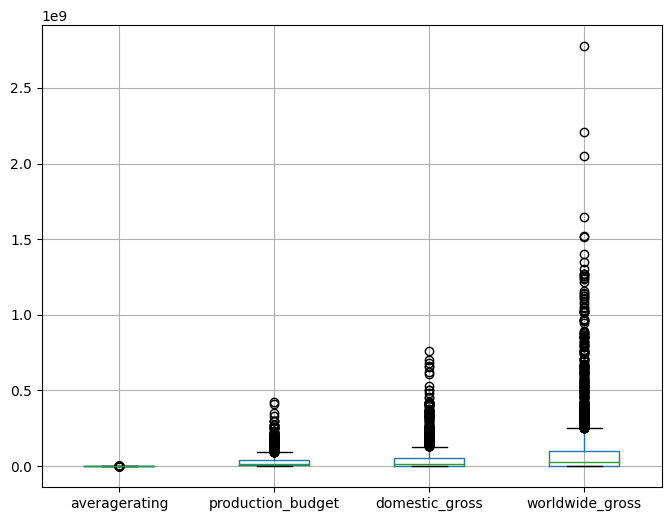

In [ ]:
# Create a new figure with the specified size
plt.figure(figsize=(8,6))

# Create a boxplot of the "movie_df" dataframe
movie_df.boxplot()

# Display the boxplot
plt.show()

Although there are outliers in averagerating, production_budget, domestic_gross, and worldwide_gross, we believe that they are important and therefore we will not eliminate them.

6. Exploratory Data Analysis

In [ ]:
# Creates a new column called "Total_revenue"
# Returns the sum of the "domestic_gross" and "worldwide_gross" columns
movie_df['Total_revenue'] = movie_df['domestic_gross'] + movie_df['worldwide_gross']

# Display the new column
movie_df['Total_revenue']


0          73706.0
1        2275804.0
2        2275804.0
3       10034130.0
4       10034130.0
           ...    
2870     6884238.0
2871     1311076.0
2872    81489928.0
2873    36215242.0
2874      390086.0
Name: Total_revenue, Length: 2875, dtype: float64

In [ ]:
# This line calculates the profit for each movie and adds a new column named "Profit" to the "movie_df" DataFrame
movie_df['Profit'] = movie_df['Total_revenue'] - movie_df['production_budget']

# This line simply displays the "Profit" column values in the "movie_df" DataFrame
movie_df['Profit']


0      -44926294.0
1        2075804.0
2        2075804.0
3      -14965870.0
4      -14965870.0
           ...    
2870    -2315762.0
2871      911076.0
2872    43489928.0
2873    30215242.0
2874      365086.0
Name: Profit, Length: 2875, dtype: float64

In [ ]:
# Define a function to categorize months into seasons
def get_season(date):
    month = pd.to_datetime(date).month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Assume that the release date is stored in a column called "release_date" in a pandas dataframe
# Categorize the release dates into seasons
movie_df['season'] = movie_df['release_date'].apply(get_season)

movie_df.head()


,movie_id,primary_title,genres,averagerating,release_date,production_budget,domestic_gross,worldwide_gross,Total_revenue,Profit,season
0,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,"Dec 31, 2012",45000000.0,0.0,73706.0,73706.0,-44926294.0,Winter
1,tt0326592,The Overnight,None,7.5,"Jun 19, 2015",200000.0,1109808.0,1165996.0,2275804.0,2075804.0,Summer
2,tt3844362,The Overnight,"Comedy,Mystery",6.1,"Jun 19, 2015",200000.0,1109808.0,1165996.0,2275804.0,2075804.0,Summer
3,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,"Mar 22, 2013",25000000.0,720828.0,9313302.0,10034130.0,-14965870.0,Spring
4,tt4339118,On the Road,Drama,6.0,"Mar 22, 2013",25000000.0,720828.0,9313302.0,10034130.0,-14965870.0,Spring


In [ ]:
# This line groups the "movie_df" DataFrame by "season" and calculates the total revenue for each season
Total_revenue_list_per_season = movie_df.groupby('season')['Total_revenue'].sum().reset_index()

# This line sorts the "Total_revenue_list_per_season" DataFrame in descending order based on the "Total_revenue" column.
Total_revenue_list_per_season = Total_revenue_list_per_season.sort_values(by='Total_revenue', ascending=False)

# Displays the "Total_revenue_list_per_season" DataFrame
Total_revenue_list_per_season


,season,Total_revenue
2,Summer,1.186132e+11
1,Spring,1.128870e+11
3,Winter,9.514851e+10
0,Autumn,9.293494e+10


In [ ]:
# Group the movies by their genres and calculate the total revenue for each genre
Total_revenue_list_per_genres = movie_df.groupby('genres')['Total_revenue'].sum().reset_index()

# Sort the genres by their total revenue in descending order and select the top 5 genres
Total_revenue_list_per_genres = Total_revenue_list_per_genres.sort_values(by='Total_revenue', ascending=False).head(5)

# Show the resulting dataframe
Total_revenue_list_per_genres


,genres,Total_revenue
13,"Action,Adventure,Sci-Fi",4.752831e+10
75,"Adventure,Animation,Comedy",3.720312e+10
227,Drama,2.065824e+10
9,"Action,Adventure,Fantasy",1.839609e+10
4,"Action,Adventure,Comedy",1.297960e+10


In [ ]:
# Compute the sum of profits for each season of movies
Profit_per_season = movie_df.groupby('season')['Profit'].sum().reset_index()

# Sort the Profit_per_season dataframe by Profit in descending order.
Profit_per_season = Profit_per_season.sort_values(by='Profit', ascending=False)

# Print the resulting dataframe
Profit_per_season

,season,Profit
2,Summer,9.268126e+10
1,Spring,8.536127e+10
3,Winter,7.279647e+10
0,Autumn,6.994737e+10


In [ ]:
# Compute the sum of profits for each genre of movies
Profit_per_genres = movie_df.groupby('genres')['Profit'].sum().reset_index()

# Sort the Profit_per_genres dataframe by Profit in descending order and select the top 10 rows
Profit_per_genres = Profit_per_genres.sort_values(by='Profit', ascending=False).head(10)

# Print the resulting dataframe
Profit_per_genres

,genres,Profit
13,"Action,Adventure,Sci-Fi",3.821291e+10
75,"Adventure,Animation,Comedy",3.006412e+10
227,Drama,1.475393e+10
9,"Action,Adventure,Fantasy",1.320549e+10
4,"Action,Adventure,Comedy",1.057260e+10
2,"Action,Adventure,Animation",8.142708e+09
287,Horror,7.424431e+09
213,Documentary,7.210241e+09
148,Comedy,7.192837e+09
107,"Adventure,Family,Fantasy",5.768569e+09


In [ ]:
# Compute the mean average rating for each genre of movies
averagerating_per_genres = movie_df.groupby('genres')['averagerating'].mean().reset_index()

# Sort the averagerating_per_genres dataframe by averagerating in descending order and select the top 10 rows
averagerating_per_genres = averagerating_per_genres.sort_values(by='averagerating', ascending=False).head(10)

# Display the resulting dataframe
averagerating_per_genres

,genres,averagerating
41,"Action,Documentary,Drama",8.700
196,"Crime,Documentary",8.250
198,"Crime,Documentary,History",8.200
216,"Documentary,Drama,History",8.100
225,"Documentary,Sport,Thriller",7.900
307,Sport,7.900
100,"Adventure,Drama,Mystery",7.900
183,"Comedy,Musical",7.800
79,"Adventure,Biography,Documentary",7.800
131,"Biography,Documentary,Drama",7.725


# Data Visualization

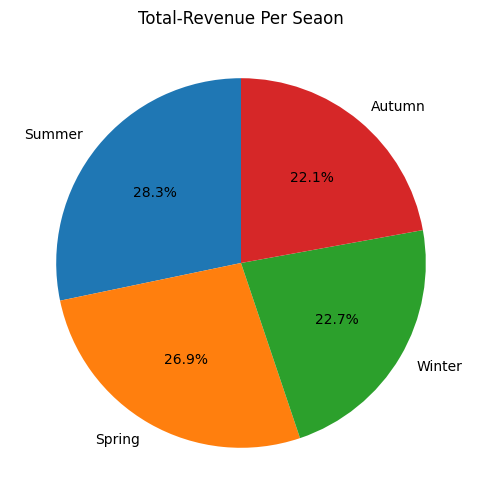

In [ ]:
plt.figure(figsize=(10, 6))

# Extract the data for the pie chart
labels = Total_revenue_list_per_season['season']
sizes = Total_revenue_list_per_season['Total_revenue']

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Total-Revenue Per Seaon')

# Display the chart
plt.show()

The pie chart shows the percentage of total revenue generated by movies in each season of the year. The largest percentage of revenue was generated by movies released in the summer season, which accounted for 28.3% of total revenue. This suggests that releasing movies in the summer season might be more profitable for Microsoft, as these season generates the highest total revenue.

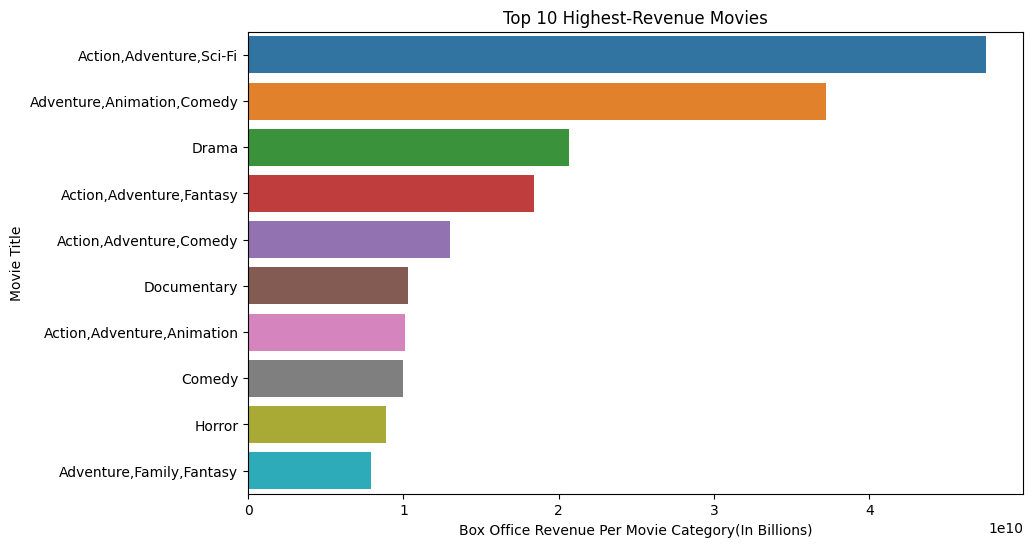

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot showing the top 10 highest-revenue movies per genre
sns.barplot(x="Total_revenue", y="genres", data=Total_revenue_list_per_genre.head(10))

# Add a title to the plot
plt.title("Top 10 Highest-Revenue Movies")

# Add labels to the x and y axes
plt.xlabel("Box Office Revenue Per Movie Category(In Billions)")
plt.ylabel("Movie Title")

# Show the plot
plt.show()

The bar plot shows the top 10 highest-revenue movies per genre. The highest revenue movie genres are Action, Adventure, and Sci-Fi. This suggests that these genres are popular among people and have a high potential for generating revenue. Therefore, if Microsoft is looking to produce a profitable movie, they may consider creating a movie within one of these genres.

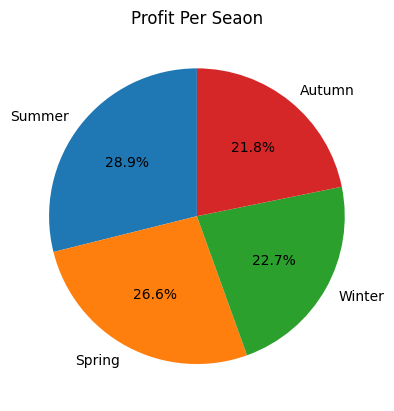

In [ ]:
# Extract the data for the pie chart
labels = Profit_per_season['season']
sizes = Profit_per_season['Profit']

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Profit Per Seaon')

# Display the chart
plt.show()


The pie chart shows the proportion of profits generated by movies in each season. The chart indicates that the highest profits were earned in the Summer season, accounting for 28.9% of the total profits. The Spring season followed, contributing 26.6% of the total profits, while Winter and Autumn were responsible for 22.7% and 21.8%, respectively. This information could be useful for Microsoft to determine the optimal season to release their movies, based on potential profits they should produce their movie during Summer.

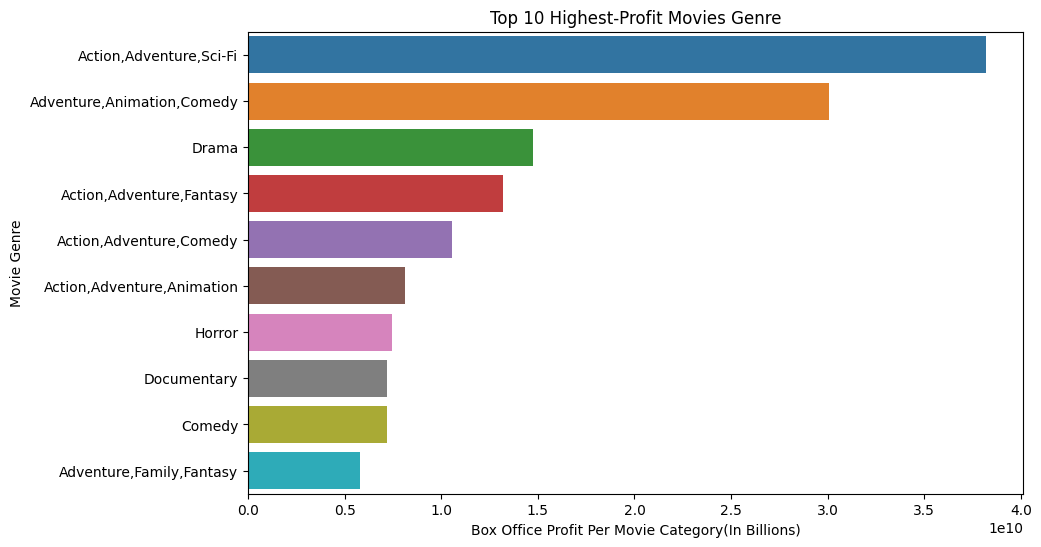

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot showing the top 10 highest-profit movies per genre
sns.barplot(x="Profit", y="genres", data=Profit_per_genres.head(20))

# Add a title to the plot
plt.title("Top 10 Highest-Profit Movies Genre")

# Add labels to the x and y axes
plt.xlabel("Box Office Profit Per Movie Category(In Billions)")
plt.ylabel("Movie Genre")

# Show the plot
plt.show()


The bar plot represents the top 10 highest-profit movies per genre, and it reveals that the genres of Action, Adventure, and Sci-fi have the highest average profits among their respective movies. This implies that if Microsoft is aiming to create a more profitable movie, they should consider producing a movie within one of these genres.

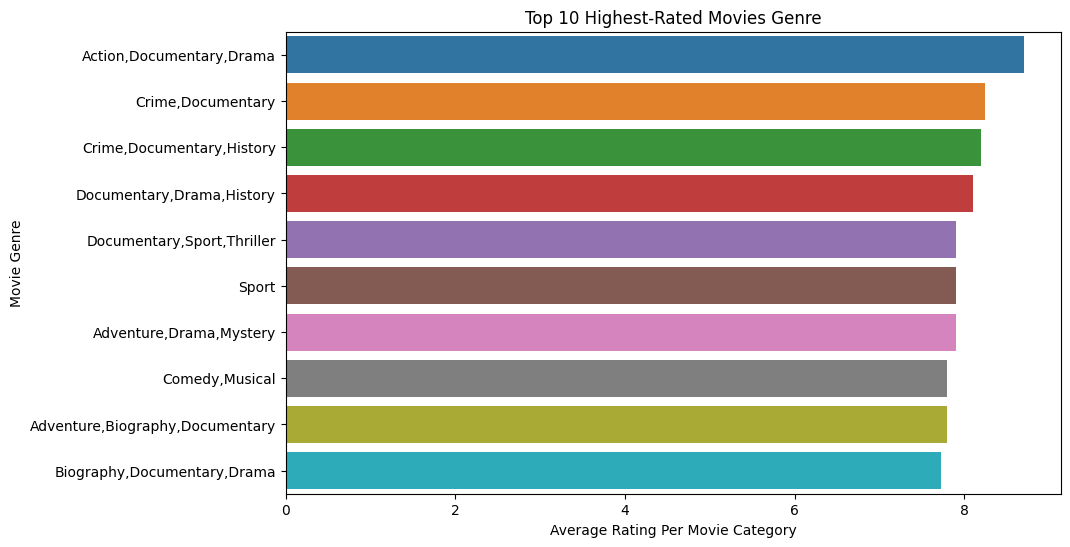

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot showing the top 10 highest-rated movies per genre
sns.barplot(x="averagerating", y="genres", data=averagerating_per_genres.head(20))

# Add a title to the plot
plt.title("Top 10 Highest-Rated Movies Genre")

# Add labels to the x and y axes
plt.xlabel("Average Rating Per Movie Category")
plt.ylabel("Movie Genre")

# Show the plot
plt.show()

The bar plot shows the top 10 highest-rated movies per genre Action, Documentary and Drama have the highest average rating of the movies in that genre. This suggests that if Microsoft is looking to create a well-received movie, they should consider producing a movie within one of these genres.

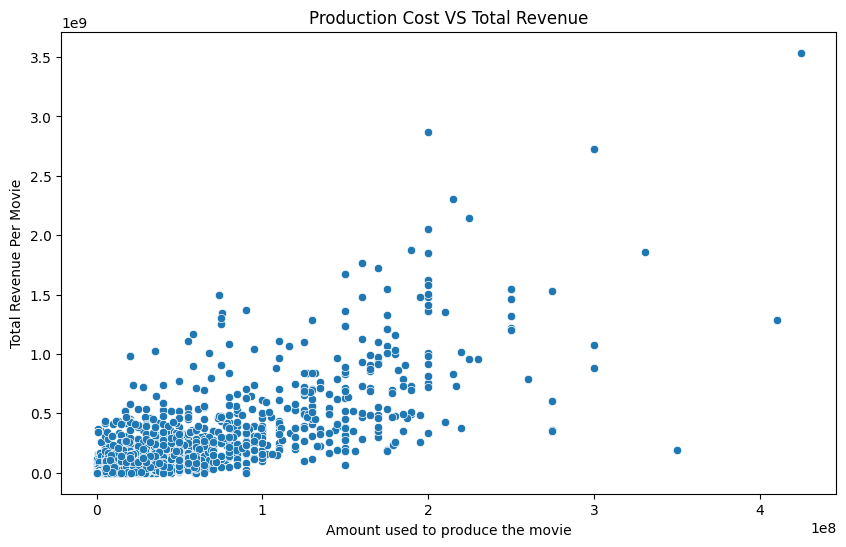

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot showing the relationship between production cost and total revenue
sns.scatterplot(x="production_budget", y="Total_revenue", data=movie_df)

# Add a title to the plot
plt.title("Production Cost VS Total Revenue")

# Add labels to the x and y axes
plt.xlabel("Amount used to produce the movie")
plt.ylabel("Total Revenue Per Movie")

# Show the plot
plt.show()


A positive correlation between production_budget and Total_revenue means that as the production budget for a movie increases, its total revenue also tends to increase. This indicates that there is a relationship between the two variables, and that movies with larger budgets are more likely to generate higher revenues.


# **Conclusion**

Based on the analysis, we can recommend that Microsoft's new movie studio focus on creating action, adventure, 
and sci-fi movies, which are currently the most popular genres and have high box office revenues. We also recommend them releasing their movie during the summer season.
Additionally, the studio should aim to create high-quality movies with strong ratings and positive reviews, 
as these are likely to perform well at the box office.